<a href="https://colab.research.google.com/github/natifernandezs/Redes_Metabolicas/blob/main/Redesmetabolicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cobra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.2 MB/s eta 0:00:00


# Stoichiometric Interpretation of Esterichia coli Glucose Catabolism under Varoious Oxygenation Rates

Amit Varma, Brian W. Boesch and Bernard Palsson

In [ ]:
import cobra
from cobra.io import load_model

model = load_model("iAF1260")

Output()

In [ ]:
model

Name,iAF1260
Memory address,7e098162ad40
Number of metabolites,1668
Number of reactions,2382
Number of genes,1261
Number of groups,0
Objective expression,1.0*BIOMASS_Ec_iAF1260_core_59p81M - 1.0*BIOMASS_Ec_iAF1260_core_59p81M_reverse_3925e
Compartments,"cytosol, periplasm, extracellular space"


In [ ]:
cobra.util.linear_reaction_coefficients(model)


{<Reaction BIOMASS_Ec_iAF1260_core_59p81M at 0x7e09810266e0>: 1.0}

/usr/local/lib/python3.10/dist-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Modelo no óptimo en esta iteración
Primer valor no nulo de acetato: q_acetato = 0.12950853783560523, mu = 0.9334040664298288
Primer valor no nulo de formato: q_formato = 0.17367579916025416, mu = 1.11922604525576
Primer valor no nulo de etanol: q_ethanol = 0.13750565462530345, mu = 1.6465094943916938
8.39


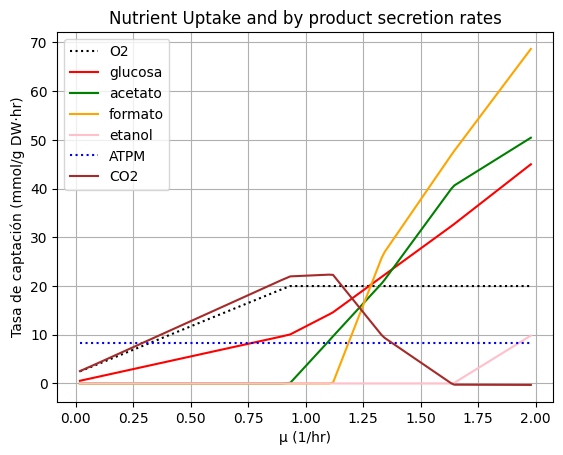

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las reacciones clave en el modelo
oxygen_rxn = model.reactions.get_by_id("EX_o2_e")
glucose_rxn = model.reactions.get_by_id("EX_glc__D_e")
biomass_rxn = model.reactions.get_by_id("BIOMASS_Ec_iAF1260_core_59p81M")
acetate_rxn = model.reactions.get_by_id("EX_ac_e")
formate_rxn = model.reactions.get_by_id("EX_for_e")
ethanol_rxn = model.reactions.get_by_id("EX_etoh_e")
CO2_rxn = model.reactions.get_by_id("EX_co2_e")
ATPM= model.reactions.get_by_id("ATPM")
oxygen_rxn.bounds = (-20, 0)

# Inicializar listas para almacenar los resultados
glucose = np.linspace(0.1, 45, 100)  # Rango de captación de glucosa
q_oxygen = []
q_glucose = []
growth_rates = []
q_acetate = []
q_formate = []
q_ethanol = []
q_co2 = []
q_atpm=[]

# Bandera para controlar la impresión del primer valor no nulo
found_first_acetate = False
found_first_formate = False
found_first_ethanol = False

# Simulaciones a diferentes tasas de captación de glucosa
for qglc in glucose:
    with model:
        # Establecer el límite de captación de glucosa
        glucose_rxn.bounds = (-qglc, 0.0)

        # Optimizar el modelo
        solution = model.optimize()

        if solution.status == 'optimal':
            # Obtener las tasas de crecimiento, captación de O2 y captación de glucosa
            mu = solution.objective_value
            qo2 = solution.fluxes[oxygen_rxn.id]
            qglc = solution.fluxes[glucose_rxn.id]
            qac = solution.fluxes[acetate_rxn.id]
            qfor = solution.fluxes[formate_rxn.id]
            qet = solution.fluxes[ethanol_rxn.id]
            qco2 = solution.fluxes[CO2_rxn.id]
            qatpm = solution.fluxes[ATPM.id]

            # Almacenar los resultados
            growth_rates.append(mu)
            q_glucose.append(-qglc)
            q_oxygen.append(-qo2)
            q_acetate.append(qac)
            q_formate.append(qfor)
            q_ethanol.append(qet)
            q_co2.append(qco2)
            q_atpm.append(qatpm)

            # Imprimir el primer valor cuando qac, qfor o qet sean diferentes de 0
            if qac != 0 and not found_first_acetate:
                print(f"Primer valor no nulo de acetato: q_acetato = {qac}, mu = {mu}")
                found_first_acetate = True

            if qfor != 0 and not found_first_formate:
                print(f"Primer valor no nulo de formato: q_formato = {qfor}, mu = {mu}")
                found_first_formate = True

            if qet != 0 and not found_first_ethanol:
                print(f"Primer valor no nulo de etanol: q_ethanol = {qet}, mu = {mu}")
                found_first_ethanol = True
        else:
            print("Modelo no óptimo en esta iteración")
print(qatpm)

# Crear el gráfico
plt.plot(growth_rates, q_oxygen, label='O2', linestyle=':', color='black')
plt.plot(growth_rates, q_glucose, label='glucosa', linestyle='-', color='red')
plt.plot(growth_rates, q_acetate, label="acetato", linestyle='-', color='green')
plt.plot(growth_rates, q_formate, label="formato", linestyle='-', color='orange')
plt.plot(growth_rates, q_ethanol, label="etanol", linestyle='-', color='pink')
plt.plot(growth_rates, q_atpm, label="ATPM", linestyle=':', color='blue')
plt.plot(growth_rates, q_co2, label="CO2", linestyle='-', color='brown')
plt.xlabel('μ (1/hr)')
plt.ylabel('Tasa de captación (mmol/g DW·hr)')
plt.title('Nutrient Uptake and by product secretion rates')
plt.legend()
plt.grid(True)
plt.show()
